In [151]:
pip install comet_ml

In [152]:
from comet_ml import Experiment

In [153]:
from comet_ml import Experiment
from comet_ml.integration.sklearn import log_model

experiment = Experiment(
  api_key="UlZbegBXuDUBBraHG96wrMwMO",
  project_name="general",
  workspace="mahlatsemakgoga"
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, xgboost.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : existing_arch_8072
COMET INFO:     url                   : https://www.comet.com/mahlatsemakgoga/general/b21cd47c1d9e4ae1be586a0972cfc081
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code          

<a id="section-one"></a>
# Introduction

The global phenomenon of climate change involves ongoing alterations in average temperatures and weather patterns. Extreme weather events and catastrophes stemming from global warming, such as hurricanes, floods, and fires, directly impact 70% of all economic sectors worldwide.

Increasingly, business leaders are recognizing the business imperative of climate change, understanding it to be an existential threat with far-reaching consequences for their people and business operations. A progressively warmer planet creates a wide range of risks for businesses, from disrupted supply chains to rising insurance costs and labor challenges.

This new reality has prompted many companies to explore ways to lessen their environmental impact and carbon footprint by offering products and services that are environmentally friendly, sustainable, and in line with their values and ideals.

Social media is a powerful source of information on a wide range of topics. Data from popular social media platforms, such as Twitter, can be harvested and analyzed to identify trends related to specific topics, measure popular sentiment, obtain feedback on past decisions, and also help shape future decisions.

<a id="section-two"></a>
# Problem Statement
The aim of this project is to gauge the public perception of climate change using twitter data. This will help companies to: 
* Access broad base consumer sentiments, and insights in order to inform future marketing strategies.
* Gain insights on people's views and perceptions about climate change. 
* Improve market research efforts for companies that provide environmentally-friendly products and services.
* Strengthen efforts to reduce carbon footprint. 

<a id="section-four"></a>
# Import libraries

In [153]:
import numpy as np
import pandas as pd
from time import time

# Packages for visualisations
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(font_scale=1.5)
import matplotlib.style as style
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image

# Packages for preprocessing
import re
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
import emoji
from ftfy import fix_text
from spellchecker import SpellChecker
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet 
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import itertools
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Packages for training models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Packages for hyperparameter optimisation
from sklearn.model_selection import GridSearchCV

# Packages for evaluating model accuracy
from sklearn import metrics
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier


C:\Users\admin\AppData\Local\Temp\ipykernel_10256\3113789901.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-pastel')
C:\Users\admin\AppData\Local\Temp\ipykernel_10256\3113789901.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


<a id="subsection-two"></a>
# Loading the Datasets

In [154]:
sample_submission = pd.read_csv ("sample_submission.csv")
test =  pd.read_csv ("test.csv")
train =  pd.read_csv ("train.csv")

In [155]:
sample_submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [156]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [157]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [158]:
# A look at the data structure
train.shape, test.shape

((15819, 3), (10546, 2))

In [159]:
#checking data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


<a id="subsection-three"></a>
# Exploratory Data Analysis

<h3> Class Description:</h3>

* <b>Class 2 News:</b> the tweet links to factual news about climate change
* <b>Class1 Pro:</b> the tweet supports the belief of man-made climate change
* <b>Class 0 Neutral:</b> the tweet neither supports nor refutes the belief of man-made climate change.
* <b>Class-1  Anti: </b> the tweet does not believe in man-made climate change Variable definitions

In [160]:
df = train
sentiment = train['sentiment']

In [161]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

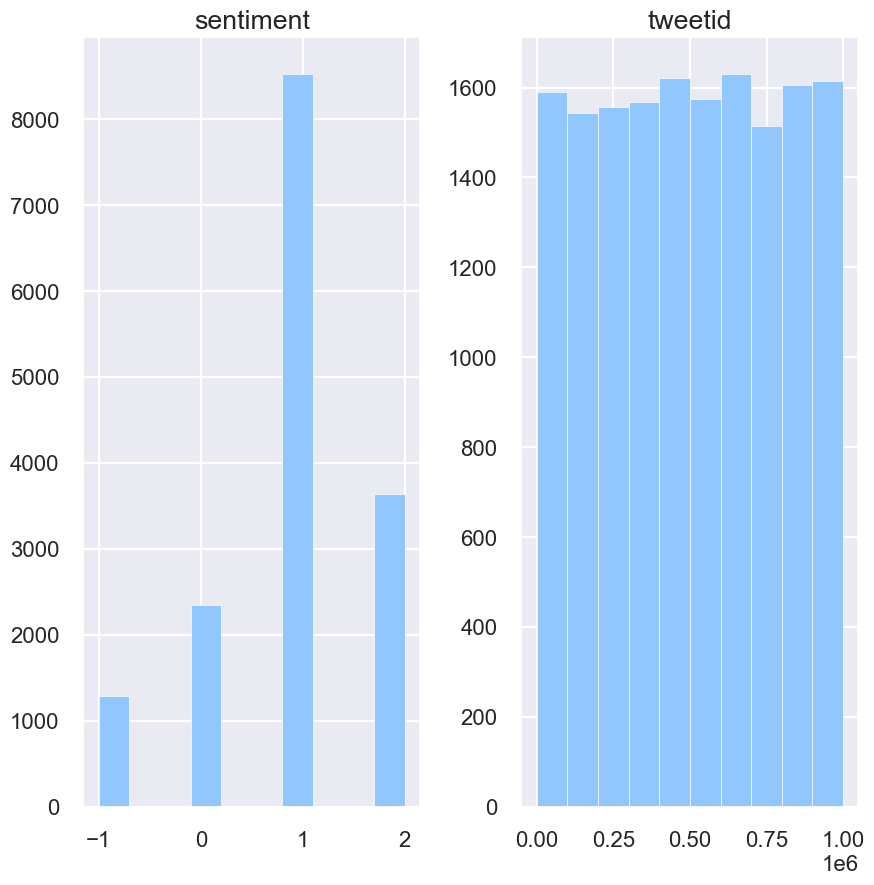

In [162]:
features = ['sentiment', 'message', 'tweetid'] # create a list of all numerical features
train[features].hist(figsize=(10,10));

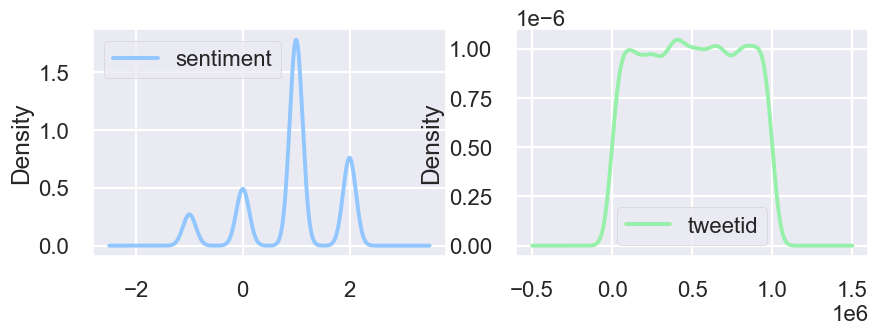

In [163]:
train[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

<a id="section-seven"></a>
# Data Preprocessing
* Extract tweet sentiments
* Extract hashtags
* Replace contractions
* Remove URLS,punctuations,mentions, numbers and extra white space
* Replace shortened words/slang
* Tokenization
* Perform lemmatization

In [164]:
# categorizing sentiments
def categorize_sentiment(sentiment):
    word_sentiment = []
    for i in sentiment:
        if i == 1:
            word_sentiment.append('Pro')
        elif i == 0:
            word_sentiment.append('Neutral')
        elif i == -1:
            word_sentiment.append('Anti')
        else:
            word_sentiment.append('News')

    return word_sentiment

# Assuming df is already defined somewhere in your code
df['sentiment'] = categorize_sentiment(sentiment)

In [165]:
def hashtag_extract(tweet):
    hashtags = []
    for i in tweet:
        # Tokenize the tweet
        tokens = nltk.word_tokenize(i)
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                               'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

pro = hashtag_extract(df['message'][df['sentiment'] == 'Pro'])
anti = hashtag_extract(df['message'][df['sentiment'] == 'Anti'])
neutral = hashtag_extract(df['message'][df['sentiment'] == 'Neutral'])
news = hashtag_extract(df['message'][df['sentiment'] == 'News'])

pro.head()

,hashtag,count
19,climate,187
24,BeforeTheFlood,129
68,climatechange,94
13,ImVotingBecause,62
4,COP22,59


In [166]:
# extracting all unque hashtags
hashtags = df['message'].apply(lambda x: re.findall(r'[#]\\w+',x))

In [167]:
# Dictionary of contracted words
contractions = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"wasn't": "was not",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we'll":"we will",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
}

In [168]:
# Replace contracted words with full words
train['message'] = [' '.join([contractions[w.lower()] if w.lower() in contractions.keys() else w for w in raw.split()]) 
                       for raw in train['message']]

# Lower case all words to remove noise from Capital words. Capital words may be seen as different from lower case words
train['message'] = train['message'].str.lower()

# Removing urls
train['message'] = train['message'].apply(lambda x: re.sub(r'https\S+','url',x))
train['message'] = train['message'].apply(lambda x: re.sub(r'www\S+', 'url',x))

In [169]:
# Replace shortened words with full words
short = {' BD ': ' Big Deal ',
 ' abt ':' about ',
 ' ab ': ' about ',
 ' fav ': ' favourite ',
 ' fab ': ' fabulous ',
 ' smh ': ' shaking my head ',
 ' u ': ' you ',
 ' c ': ' see ',
 ' anon ': ' anonymous ',
 ' ac ': ' aircon ',
 ' a/c ': ' aircon ',
 ' yo ':' year old ',
 ' n ':' and ',
 ' nd ':' and ',
 ' 2 ': ' to ',
 ' w ': ' with ',
 ' w/o ': ' without ',
 ' r ': ' are ',
 ' rip ':' rest in peace ',
 ' 4 ' : ' for ',
' BF ': ' Boyfriend ',
' BRB ': ' Be Right Back ',
' BTW ': ' By The Way ',
' GF ': ' Girlfriend ',
' HBD ': ' Happy Birthday ',
' JK ': ' Just Kidding ',
' K ':' Okay ',
' LMK ': ' Let Me Know ',
' LOL ': ' Laugh Out Loud ',
' HA ':' laugh ',
' MYOB ': ' Mind Your Own Business ',
' NBD ': ' No Big Deal ',
' NVM ': ' Nevermind ',
' Obv ':' Obviously ',
' Obvi ':' Obviously ',
' OMG ': ' Oh My God ',
' Pls ': ' Please ',
' Plz ': ' Please ',
' Q ': ' Question ', 
' QQ ': ' Quick Question ',
' RLY ': ' Really ',
' SRLSY ': ' Seriously ',
' TMI ': ' Too Much Information ',
' TY ': ' Thank You, ',
' TYVM ': ' Thank You Very Much ',
' YW ': ' You are Welcome ',
' FOMO ': ' Fear Of Missing Out ',
' FTFY ': ' Fixed This For You ',
' FTW ': ' For The Win ',
' FYA ': ' For Your Amusement ',
' FYE ': ' For Your Entertainment ',
' GTI ': ' Going Through It ',
' HTH ': ' Here to Help ',
' IRL ': ' In Real Life ',
' ICYMI ': ' In Case You Missed It ',
' ICYWW ': ' In Case You Were Wondering ',
' NBC ': ' Nobody Cares Though ',
' NTW ': ' Not To Worry ',
' OTD ': ' Of The Day ',
' OOTD ': ' Outfit Of The Day ',
' QOTD ': ' Quote of the Day ',
' FOTD ': ' Find Of the Day ',
' POIDH ': ' Pictures Or It Did ntt Happen ',
' YOLO ': ' You Only Live Once ',
' AFAIK ': ' As Far As I Know ',
' DGYF ': ' Dang Girl You Fine ',
' FWIW ': ' For What It is Worth ',
' IDC ': ' I Do not Care ',
' IDK ': ' I Do not Know ',
' IIRC ': ' If I Remember Correctly ',
' IMHO ': ' In My Honest Opinion ',
' IMO ': ' In My Opinion ',
' Jelly ': ' Jealous ',
' Jellz ': ' Jealous ',
' JSYK ': ' Just So You Know ',
' LMAO ': ' Laughing My Ass Off ',
' LMFAO ': ' Laughing My Fucking Ass Off ',
' NTS ': ' Note to Self ',
' ROFL ': ' Rolling On the Floor Laughing ',
' ROFLMAO ': ' Rolling On the Floor Laughing My Ass Off ',
' SMH ': ' Shaking My Head ',
' TBH ': ' To Be Honest ',
' TL;DR ':  ' Too Long; Did not Read ',
' TLDR ':  ' Too Long; Did not Read ',
' YGTR ': ' You Got That Right ',
' AYKMWTS ': ' Are You Kidding Me With This Shit ',
' BAMF ': ' Bad Ass Mother Fucker ',
' FFS ': ' For Fuck Sake ',
' FML ': ' Fuck My Life ',
' HYFR ': ' Hell Yeah Fucking Right ',
' IDGAF ': ' I Do not Give A Fuck ',
' NFW ': ' No Fucking Way ',
' PITA ': ' Pain In The Ass ',
' POS ': ' Piece of Shit ',
' SOL ': ' Shit Outta Luck ',
' STFU ': ' Shut the Fuck Up ',
' TF ': ' The Fuck ',
' WTF ': ' What The Fuck ',
' BFN ': ' Bye For Now ',
' CU ': ' See You ',
' IC ': ' I see ',
' CYL ': ' See You Later ',
' GTG ': ' Got to Go ',
' OMW ': ' On My Way ',
' RN ': ' Right Now ',
' TTYL ': ' Talk To You Later ',
' TYT ': ' Take Your time ',
' CC ': ' Carbon Copy ',
' CX ': ' Correction ',
' DM ': ' Direct Message ',
' FB ': ' Facebook ',
' FBF ': ' Flash-Back Friday ',
' FF ': ' Follow Friday ',
' HT ': ' Tipping my hat ',
' H/T ': ' Tipping my hat ',
' IG ': ' Instagram ',
' Insta ': ' Instagram ',
' MT ':' Modified Tweet ',
' OH ': ' Overheard ',
' PRT ': ' Partial Retweet ',
' RT ': ' Retweet ',
'rt ' : ' retweet ',
' SO ':' Shout Out ',
' S/O ': ' Shout Out ',
' TBT ': ' Throw-Back Thursday ',
' AWOL ': ' Away While Online ',
' BFF ': ' Best Friend Forever ',
' NSFW ': ' Not Safe For Work ',
' OG ': ' Original Gangster ',
' PSA ': ' Public Service Announcement ',
' PDA ': ' Public Display of Affection '}

short = dict((key.lower(), value.lower()) for key,value in short.items())

In [170]:
# Replacing shortened words with full alternative words
for word in short.keys():
    train['message'] = train['message'].apply(lambda x: re.sub(word,short[word],x))

In [171]:
# Remove punctuations
train['message'] = train['message'].apply(lambda x: re.sub(r"[^A-Za-z ]*",'',x))

In [172]:
# Remove Non-News Handles
def remove_non_news_handles(tweet, news_handles):
    # Find all Twitter handles in the tweet
    twitter_handles = re.findall(r'@[\w]*', tweet)
    
    # Filter out handles not in the news_handles list
    filtered_handles = [handle for handle in twitter_handles if handle in news_handles]
    
    # Replace each handle with an empty string and remove '@' symbol
    cleaned_tweet = re.sub(r'@[^\s]+', '', tweet)
    
    return cleaned_tweet

# Assuming 'news' is a list of Twitter handles representing news accounts
train['message'] = train['message'].apply(lambda x: remove_non_news_handles(x, news))

In [173]:
# Clean the raw data
def clean(data):
    data = data.lower()
    
    # Fix strange characters
    data = fix_text(data)
    
    # Removing urls
    data = re.sub(r'https\S+','url',data)
    data = re.sub(r'www\S+', 'url',data)

    # Remove twitter non news related handles
    data = ' '.join([y for y in data.split() if y not in [x for x in re.findall(r'@[\w]*',data) if x not in news]])
    
    # Add sentiment
    data = data + ' ' + sentiment(data)
    
    # Remove punctuation
    data = re.sub(r"[^A-Za-z ]*",'',data)
    
    
    return data

In [174]:
# Replace contracted words with full word
test['message'] = [' '.join([contractions[w.lower()] if w.lower() in contractions.keys() else w for w in data.split()]) 
                      for data in test['message']]

In [175]:
# Replacing shortened words with full words
for word in short.keys():
    test['message'] = test['message'].apply(lambda x: re.sub(word,short[word],x))

In [176]:
# Apply cleaning function
def clean(text):
    # Your cleaning logic here
    cleaned_text = text.lower()  # Example: Convert text to lowercase
    return cleaned_text

# Apply cleaning function to the 'message' column of the DataFrame 'test'
test['message'] = test['message'].apply(clean)

In [177]:
# Now Vectorizing
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def frequency(tweet):
    # Count vectorizer excluding English stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(tweet)
    
    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a DataFrame to store the top 25 words and their frequencies
    frequency_df = pd.DataFrame(words_freq, columns=['word', 'frequency'])
    frequency_df = frequency_df.head(25)
    
    return frequency_df

# Extract the top 25 words in each class
pro_frequency = frequency(df['message'][df['sentiment'] == 'Pro'])
anti_frequency = frequency(df['message'][df['sentiment'] == 'Anti'])
news_frequency = frequency(df['message'][df['sentiment'] == 'News'])
neutral_frequency = frequency(df['message'][df['sentiment'] == 'Neutral'])


In [178]:
# check for duplicates
dup_tweets = round((1-(df['message'].nunique()/len(df['message'])))*100,2)
print('Percentage of duplicated tweets in train data:')
print(dup_tweets,'%')

Percentage of duplicated tweets in train data:
12.35 %


In [179]:
# Target variable analysis
print('Number of tweets per sentiment class')
df['sentiment'].replace({-1: 'Anti',0:'Neutral',1:'Pro',2:'News'}).value_counts()

Number of tweets per sentiment class


Pro        8530
News       3640
Neutral    2353
Anti       1296
Name: sentiment, dtype: int64

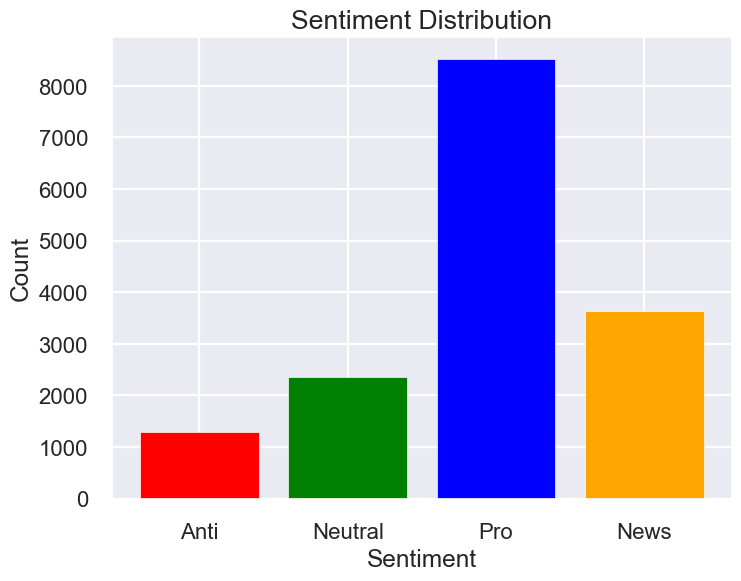

In [180]:
category_labels = {
    -1: "Anti",
    0: "Neutral",
    1: "Pro",
    2: "News"
}

# Sample sentiment distribution data (replace with your actual data)
category_counts = {
    "Pro": 8530,
    "News": 3640,
    "Neutral": 2353,
    "Anti": 1296
}

# Extract labels and counts from the dictionary
labels = list(category_labels.values())
counts = [category_counts[label] for label in labels]

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['red', 'green', 'blue', 'orange'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

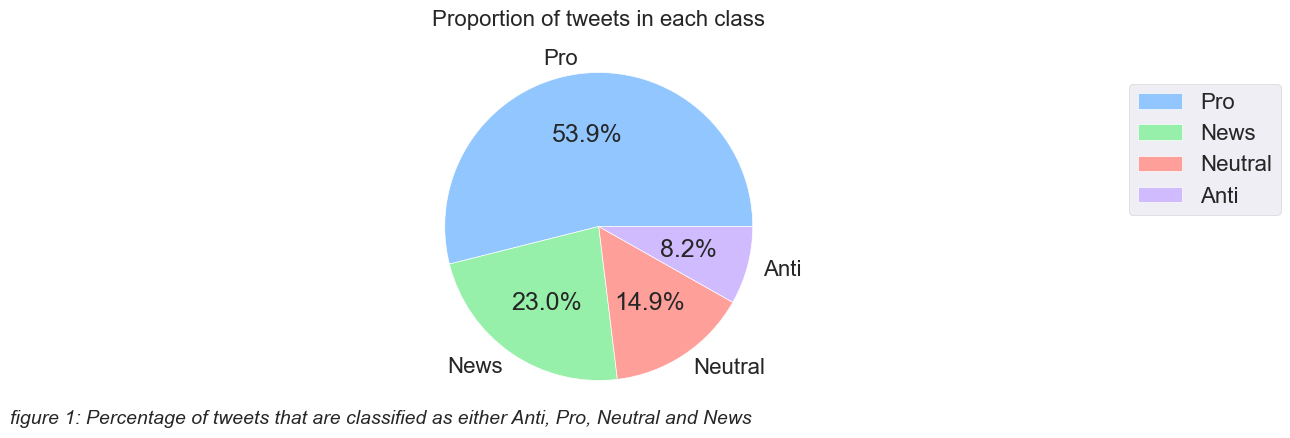

In [181]:
plot1 = plt.figure(figsize=(15,5))
names = ['Pro','News','Neutral','Anti']
perc = df['sentiment'].replace({-1: 'Anti',0:'Neutral',1:'Pro',2:'News'}).value_counts()
perc.name = ''
perc.plot(kind='pie', labels=names, autopct='%1.1f%%')
plt.title('Proportion of tweets in each class',fontsize = 16)
plt.figtext(0.12, 0.1, 'figure 1: Percentage of tweets that are classified as either Anti, Pro, Neutral and News',
            horizontalalignment='left',fontsize = 14,style='italic')
plt.legend(df['sentiment'].replace({-1: 'Anti: Does not believe in man-made climate change',
                                          0:'Neutral: Neither believes nor refutes man-made climate change',
                                          1:'Pro:Believe in man-made climate change',
                                          2:'News: Factual News about climate change'}).value_counts().index,
           bbox_to_anchor=(2.3,0.7), loc="right")

plt.show()

In [182]:
X = train['message']  
y = train['sentiment']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2042)

# Building Pipelines

In [183]:
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])

In [184]:
# Create a list of classifiers
classifiers = {
    "SVM": SVC(class_weight='balanced'),
    "LightGBM": LGBMClassifier(class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Multi-layer Perceptron": MLPClassifier(),
    "RandomForestClassifier": RandomForestClassifier(max_depth=5, n_estimators=100, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced'),
    "Multi-layer Perceptron": MLPClassifier(),
    "Linear SVC": LinearSVC(class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', clf)
    ])
    pipeline.fit(X_train, y_train)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_micro')
    print(f"{clf_name} F1 Score: {scores.mean():.2f}")

SVM F1 Score: 0.73
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 6.740114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32676
[LightGBM] [Info] Number of data points in the train set: 12655, number of used features: 1077
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 16.037920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26257
[LightGBM] [Info] Number of data points in the train set: 10124, number of used features: 877
[LightGBM] [Info] Start training from score -1.386294

C:\Users\admin\.conda\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\admin\.conda\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\admin\.conda\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\admin\.conda\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\admin\.conda\Lib\site-packages\sklearn\svm\_classes.py:31: Futu

Linear SVC F1 Score: 0.74
XGBoost F1 Score: 0.67


#### Obesevations
Based on the list of classifiers, it's evident that the top three best-performing models are as follows:
* SVM: F1_micro Score of 0.73
* Multi-layer Perceptron: F1_micro Score of 0.72
* Logistic Regression: F1_micro Score of 0.70

However, the following models did not perform as well:
* K-Nearest Neighbors: F1_micro Score of 0.65
* Multinomial Naive Bayes: F1_micro Score of 0.63
* RandomForestClassifier: F1_micro Score of 0.49

As a result, I will only perform hyperparameter tuning on the top three models.

# Hyperparameter Tuning

## Hyperparameter Tuning for SVM:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# SVM Classifier
svm = SVC(class_weight='balanced')

# Pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', svm)
])

# Define the parameters for grid search
svm_parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75, 1.0),
    'tfidf__max_features': (None, 5000, 10000, 20000),
    'clf__C': [0.1, 1, 10, 100],
    'clf__gamma': [1, 0.1, 0.01, 0.001],
    'clf__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# GridSearchCV
svm_grid_search = GridSearchCV(svm_pipeline, svm_parameters, cv=5, n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train, y_train)

# Output the best parameters
print("SVM Best Parameters:")
print(svm_grid_search.best_params_)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


## Hyperparameter Tuning for Multi-layer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

# MLP Classifier
mlp = MLPClassifier()

# Pipeline
mlp_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', mlp)
])

# Define the parameters for grid search
mlp_parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75, 1.0),
    'tfidf__max_features': (None, 5000, 10000, 20000),
    'clf__hidden_layer_sizes': [(50,), (100,), (150,)],
    'clf__activation': ['logistic', 'tanh', 'relu'],
    'clf__solver': ['sgd', 'adam'],
    'clf__alpha': [0.0001, 0.001, 0.01],
    'clf__learning_rate': ['constant', 'adaptive']
}

# GridSearchCV
mlp_grid_search = GridSearchCV(mlp_pipeline, mlp_parameters, cv=5, n_jobs=-1, verbose=1)
mlp_grid_search.fit(X_train, y_train)

# Output the best parameters
print("\nMulti-layer Perceptron Best Parameters:")
print(mlp_grid_search.best_params_)


## Hyperparameter Tuning for Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
logistic = LogisticRegression(class_weight='balanced')

# Pipeline
logistic_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', logistic)
])

# Define the parameters for grid search
logistic_parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75, 1.0),
    'tfidf__max_features': (None, 5000, 10000, 20000),
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

# GridSearchCV
logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_parameters, cv=5, n_jobs=-1, verbose=1)
logistic_grid_search.fit(X_train, y_train)

# Output the best parameters
print("\nLogistic Regression Best Parameters:")
print(logistic_grid_search.best_params_)

# Submission

In [ ]:
y_test = grid_search.predict(test['message'])
output = pd.DataFrame({'tweetid': test.tweetid,
                       'sentiment': y_test})
output['sentiment'] = output['sentiment'].replace({'Anti':-1, 'Neutral':0, 'Pro':1, 'News':2})
output['sentiment'].value_counts()


output.to_csv('submission_lsvc.csv', index=False)
